Department of Physics, University of Pisa (AA 2023-2024)

### **Multimessenger Physics Laboratory tutorial series**



## **Tutorial 05 - Putting all together: Pandas and FITS files**
#### (M. Razzano, Jan, 2024)

In this tutorial we will learn how to read and convert FITS files to a format readable by the Python Data Analysis Library (pandas), and use pandas to manipulate data. The dataset that we will use is the Fermi Large Area Telescope 3 Catalog

More information can be found on the [Official Page of Pandas](https://pandas.pydata.org) and the [Astropy Data Tables](https://docs.astropy.org/en/stable/table/)

In [1]:
#import Numpy
import os
import numpy as np
import pandas as pd

# Import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

#Now, import the FITS module inside Astropy
from astropy.io import fits

#Define the various directories
tutorials_dir = os.getcwd()

#using dirname you can go up of one directory
main_dir = os.path.dirname(tutorials_dir)

#then use join to define variables pointing to subdirectories
data_dir = os.path.join(main_dir,"data")

print("Project main dir is %s" % main_dir)
print("Data dir is %s" %data_dir)
print("Tutorials dir is %s" %tutorials_dir)

Project main dir is /home/jovyan/homework-02-data-manipulation-with-pandas-chiaramasia01
Data dir is /home/jovyan/homework-02-data-manipulation-with-pandas-chiaramasia01/data
Tutorials dir is /home/jovyan/homework-02-data-manipulation-with-pandas-chiaramasia01/tutorials


In [2]:
#we can create a results dir, if it is not here
results_dir = os.path.join(main_dir,"results")

if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    
print("Results dir is %s" %results_dir)
#PLEASE NOTE - after that, you should "git add" this directory as well

Results dir is /home/jovyan/homework-02-data-manipulation-with-pandas-chiaramasia01/results


In [3]:
#Read the file and convert the Source table to a Pandas Dataframe

#We use as an example the Fermi LAT 4-year Catalog (3FGL) of gamma-ray sources detected by the Fermi Large Area Telescope.
# More details in "FERMI LARGE AREA TELESCOPE THIRD SOURCE CATALOG", Acero et al. (Fermi-LAT Collaboration), 2015, ApJS  
input_filename = os.path.join(data_dir,"fermi_lat_3fgl_gll_psc_v16.fits")

#First, you can open the file and check the information in it
fits_info = fits.open(input_filename)

#...like the number of HDU, in this case 5
fits_info.info()

Filename: /home/jovyan/homework-02-data-manipulation-with-pandas-chiaramasia01/data/fermi_lat_3fgl_gll_psc_v16.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1  LAT_Point_Source_Catalog    1 BinTableHDU    463   3034R x 77C   [18A, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, 16A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 2E, E, E, E, 2E, E, E, E, 2E, E, E, E, 2E, E, E, E, 2E, E, E, E, E, E, E, D, E, 48E, 96E, 18A, 17A, 18A, 18A, 18A, 15A, 14A, 15A, A, 21A, 5A, 26A, 26A, I]   
  2  ROIs          1 BinTableHDU    108   840R x 12C   [I, E, E, E, E, E, E, E, E, E, E, E]   
  3  Hist_Start    1 BinTableHDU     43   49R x 1C   [D]   
  4  GTI           1 BinTableHDU    126   22858R x 2C   [D, D]   
  5  ExtendedSources    1 BinTableHDU     74   25R x 11C   [15A, 18A, E, E, E, E, 14A, E, E, E, 18A]   


In [6]:
#Now, we want to read the HDU 1. We can do by specifying the ext parameter
data, header = fits.getdata(input_filename, ext=1,header=True)

#and we can look at the header
data.columns

ColDefs(
    name = 'Source_Name'; format = '18A'
    name = 'RAJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLON'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLAT'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_SemiMajor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_SemiMinor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_PosAng'; format = 'E'; unit = 'deg'; disp = 'F8.3'
    name = 'Conf_95_SemiMajor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_95_SemiMinor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_95_PosAng'; format = 'E'; unit = 'deg'; disp = 'F8.3'
    name = 'ROI_num'; format = 'I'
    name = 'Signif_Avg'; format = 'E'; disp = 'F8.3'
    name = 'Pivot_Energy'; format = 'E'; unit = 'MeV'; disp = 'F10.2'
    name = 'Flux_Density'; format = 'E'; unit = 'photon/cm**2/MeV/s'; disp = 'E10.4'
    name = 'Unc_Flu

In [8]:
#Now convert to an astropy Table

#Now we convert the data to a Astropy Table object
from astropy.table import Table

sources_data = Table(data)
print("Data contains %d LAT sources" % len(sources_data))

#Remove the Flux_History and Unc_Flux_History columns
sources_data.remove_column("Flux_History")
sources_data.remove_column("Unc_Flux_History")

for ci in sources_data.colnames:
    if len(sources_data[ci].shape)>1:
        sources_data.remove_column(ci)
        print("Removing %s " % ci)
        
sources_data.colnames

Data contains 3034 LAT sources
Removing Unc_Flux100_300 
Removing Unc_Flux300_1000 
Removing Unc_Flux1000_3000 
Removing Unc_Flux3000_10000 
Removing Unc_Flux10000_100000 


['Source_Name',
 'RAJ2000',
 'DEJ2000',
 'GLON',
 'GLAT',
 'Conf_68_SemiMajor',
 'Conf_68_SemiMinor',
 'Conf_68_PosAng',
 'Conf_95_SemiMajor',
 'Conf_95_SemiMinor',
 'Conf_95_PosAng',
 'ROI_num',
 'Signif_Avg',
 'Pivot_Energy',
 'Flux_Density',
 'Unc_Flux_Density',
 'Flux1000',
 'Unc_Flux1000',
 'Energy_Flux100',
 'Unc_Energy_Flux100',
 'Signif_Curve',
 'SpectrumType',
 'Spectral_Index',
 'Unc_Spectral_Index',
 'beta',
 'Unc_beta',
 'Cutoff',
 'Unc_Cutoff',
 'Exp_Index',
 'Unc_Exp_Index',
 'PowerLaw_Index',
 'Flux30_100',
 'Unc_Flux30_100',
 'nuFnu30_100',
 'Sqrt_TS30_100',
 'Flux100_300',
 'nuFnu100_300',
 'Sqrt_TS100_300',
 'Flux300_1000',
 'nuFnu300_1000',
 'Sqrt_TS300_1000',
 'Flux1000_3000',
 'nuFnu1000_3000',
 'Sqrt_TS1000_3000',
 'Flux3000_10000',
 'nuFnu3000_10000',
 'Sqrt_TS3000_10000',
 'Flux10000_100000',
 'nuFnu10000_100000',
 'Sqrt_TS10000_100000',
 'Variability_Index',
 'Signif_Peak',
 'Flux_Peak',
 'Unc_Flux_Peak',
 'Time_Peak',
 'Peak_Interval',
 'Extended_Source_Name',

In [9]:
#And then to a Pandas dataframe
sources_df = sources_data.to_pandas()
sources_df.sample(5)

,Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,...,1FHL_Name,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,ASSOC1,ASSOC2,Flags
2047,3FGL J1645.2-5747,251.323395,-57.789799,330.233856,-7.914102,0.070677,0.063708,-19.030001,0.1146,0.1033,...,,,,,N,,bcu,AT20G J164513-575122,,24
3,3FGL J0001.2-0748,0.320900,-7.815900,89.022202,-67.324249,0.050325,0.042924,-19.469999,0.0816,0.0696,...,,,,,N,,bll,PMN J0001-0746,,0
682,3FGL J0609.4-0248,92.351601,-2.806100,210.629745,-10.628022,0.024916,0.023251,-81.639999,0.0404,0.0377,...,1FHL J0609.4-0248,,,,N,,bll,NVSS J060915-024754,,0
2982,3FGL J2334.8+1432,353.723602,14.539700,96.575539,-44.379578,0.021277,0.018872,51.740002,0.0345,0.0306,...,1FHL J2334.7+1433,,,,N,,bll,NVSS J233453+143214,,0
1919,3FGL J1549.9-3044,237.475204,-30.745501,342.367798,18.141542,0.040519,0.038422,-21.469999,0.0657,0.0623,...,,,,,N,,,,,0


<h2>Investigating the 3FGL Catalog</h2>

Can you answer these questions?

<ul>
    <li>How many sources are in the catalog?
    <li>How many classes are in the catalog? (use CLASS1 column)
    <li>How many unidentified?
    <li>Can you plot the sky distribution in Galactic Coordinates of identified and unidentified sources?
    <li> what is the galactic latitude distributions of pulsars (PSR) vs blazars (BLL+FSRQ+BCU)?
</ul>

In [11]:
n_sources = len(sources_df)
print("N sources = %d" % n_sources)

#how many classes? We use the unique function of numpy on the CLASS 1
src_class = np.unique(sources_df["CLASS1"]) # find the unique elements on an array

print("Found %d Classes: ",len(src_class),src_class)

N sources = 3034
Found %d Classes:  30 ['     ' 'BCU  ' 'BIN  ' 'BLL  ' 'FSRQ ' 'GAL  ' 'HMB  ' 'NLSY1' 'NOV  '
 'PSR  ' 'PWN  ' 'RDG  ' 'SFR  ' 'SNR  ' 'agn  ' 'bcu  ' 'bll  ' 'css  '
 'fsrq ' 'gal  ' 'glc  ' 'nlsy1' 'psr  ' 'pwn  ' 'rdg  ' 'sbg  ' 'sey  '
 'snr  ' 'spp  ' 'ssrq ']


In [ ]:
#some class names are lowercase, make all uppercase

sources_df["CLASS1"] = sources_df["CLASS1"].str.upper()

#re-define the class names one time...
src_class = np.unique(sources_df["CLASS1"])
print("Found %d Classes: ",len(src_class),src_class)

#Also, remove the blank spaces, using the rstrip function
#sources_df["CLASS1"] = sources_df["CLASS1"].str.rstrip("")
#sources_df["CLASS1"] = sources_df["CLASS1"].str.strip(" ")

#print("Cleaned class names ",src_class)


NameError: name 'sources_df' is not defined

In [15]:
#still, class names contain blank spaces, let's get rid of them
sources_df["CLASS1"] = sources_df["CLASS1"].str.strip(" ")
#re-define the class names one time...
src_class = np.unique(sources_df["CLASS1"])

print("Found %d Classes: ",len(src_class),src_class)

Found %d Classes:  21 ['' 'AGN' 'BCU' 'BIN' 'BLL' 'CSS' 'FSRQ' 'GAL' 'GLC' 'HMB' 'NLSY1' 'NOV'
 'PSR' 'PWN' 'RDG' 'SBG' 'SEY' 'SFR' 'SNR' 'SPP' 'SSRQ']


In [18]:
#How many unidentified?  
mask_unid = sources_df["CLASS1"]==""
print(mask_unid[:20])

print("Num unid sources: %d" % len(sources_df[mask_unid]))

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
11     True
12    False
13     True
14     True
15    False
16     True
17    False
18     True
19    False
Name: CLASS1, dtype: bool
Num unid sources: 1010


In [19]:
print("10 Random UNID sources")
sources_df[mask_unid].sample(2)

10 Random UNID sources


,Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,...,1FHL_Name,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,ASSOC1,ASSOC2,Flags
0,3FGL J0000.1+6545,0.037700,65.751701,117.693878,3.402958,0.062845,0.048105,41.029999,0.1019,0.078,...,,,,,N,,,,,4
642,3FGL J0540.8+3503c,85.214798,35.064301,174.253601,2.358849,0.350918,0.058589,-63.439999,0.5690,0.095,...,,,,,N,,,,,48


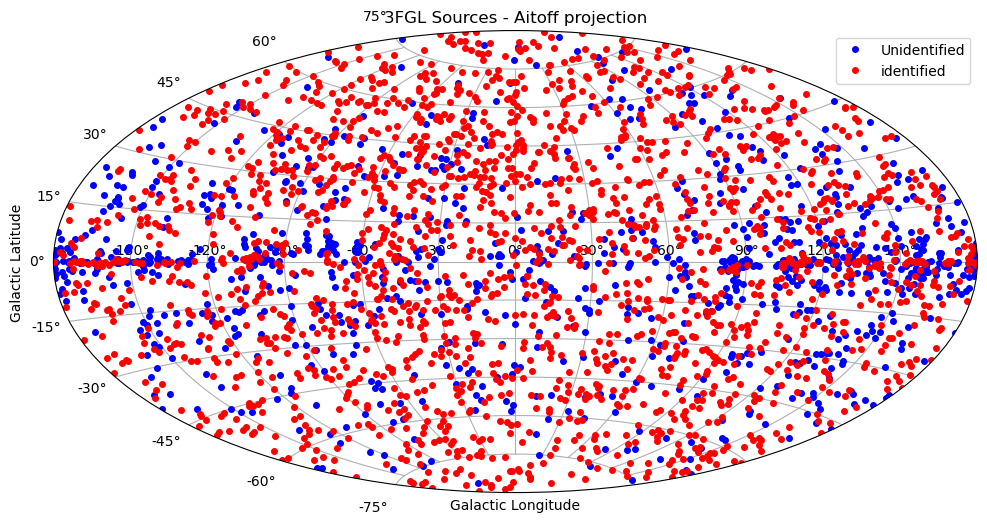

<Figure size 640x480 with 0 Axes>

In [20]:
#Plot Galactic sky distribution 
plt.figure(1,figsize=(12,6))
plt.subplot(111, projection="aitoff")
# pay attention to the fact that aitoff projection needs angles in radians and longitude needs to be in the range [-pi, pi]
glon_unid_rad = np.radians(sources_df[mask_unid]["GLON"]) - np.pi
glat_unid_rad = np.radians(sources_df[mask_unid]["GLAT"])

plt.grid(True)
plt.plot(glon_unid_rad, glat_unid_rad, 'o', markersize=4, color="b",label="Unidentified")


#The identified are the NOT of the mask, that can be obtained with np.invert
mask_id = np.invert(mask_unid)

glon_id_rad = np.radians(sources_df[mask_id]["GLON"]) - np.pi
glat_id_rad = np.radians(sources_df[mask_id]["GLAT"])

plt.plot(glon_id_rad, glat_id_rad, 'o', markersize=4, color="r",label="identified")
plt.xlabel("Galactic Longitude")
plt.ylabel("Galactic Latitude")
plt.title("3FGL Sources - Aitoff projection")

plt.legend()
plt.show()

#we can save the plots in the results dir
out_name = os.path.join(results_dir,"id_vs_unid_skymap.png")
plt.savefig(out_name)

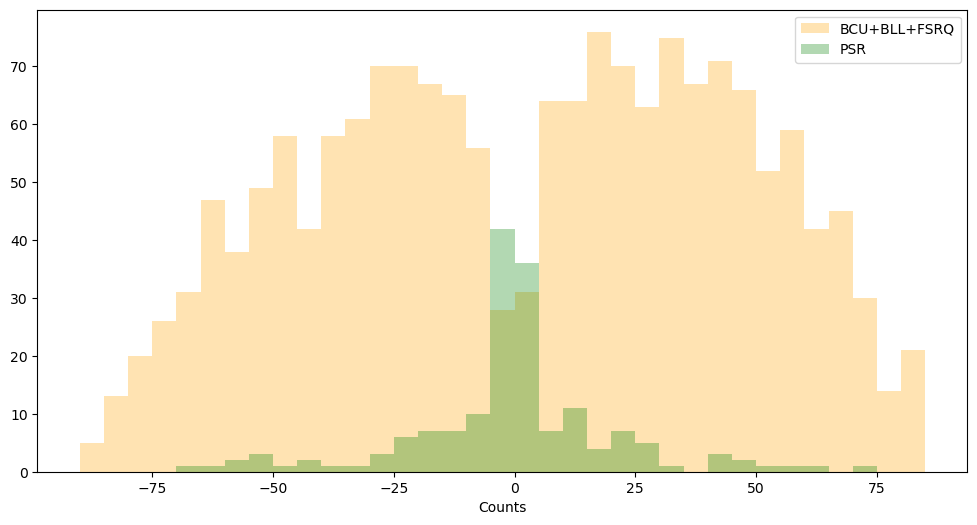

In [21]:
#PLot the GLAT distribution of pulsars vs BLL

#How many unidentified? Use the logic operator |
mask_psr = sources_df["CLASS1"]=="PSR"
mask_blazar = (sources_df["CLASS1"]=="BCU") | (sources_df["CLASS1"]=="BLL") | (sources_df["CLASS1"]=="FSRQ") # sbarra verticale vuol dire or

#Plot an histogram
plt.figure(2,figsize=(12,6))

b_bins=np.arange(-90,90,5)

plt.hist(sources_df[mask_blazar]["GLAT"],bins=b_bins,color="orange",label="BCU+BLL+FSRQ",alpha=0.3)
plt.hist(sources_df[mask_psr]["GLAT"],bins=b_bins,color="green",label="PSR",alpha=0.3)
plt.xlabel("Galactic Latitude")
plt.xlabel("Counts")
plt.legend()

#we can save the plots in the results dir
out_name = os.path.join(results_dir,"unid_distribution.png")
plt.savefig(out_name)